In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('aq_survey.csv')

In [3]:
data.head()

StartDate  \
0                                         Start Date   
1  {"ImportId":"startDate","timeZone":"America/Lo...   
2                                2019-06-24 17:10:09   
3                                2019-06-24 17:45:50   
4                                2019-07-08 15:50:41   

                                             EndDate                 Status  \
0                                           End Date          Response Type   
1  {"ImportId":"endDate","timeZone":"America/Los_...  {"ImportId":"status"}   
2                                2019-06-24 17:10:58         Survey Preview   
3                                2019-06-24 17:46:18         Survey Preview   
4                                2019-07-08 15:52:29             IP Address   

                  Progress    Duration (in seconds)                 Finished  \
0                 Progress    Duration (in seconds)                 Finished   
1  {"ImportId":"progress"}  {"ImportId":"duration"}  {"ImportId":"finished"}   
2                      100                       49                     True   
3                      100                       28                     True   
4                      100                      108                     True   

                                        RecordedDate  \
0                                      Recorded Date   
1  {"ImportId":"recordedDate","timeZone":"America...   
2                                2019-06-24 17:10:59   
3                                2019-06-24 17:46:18   
4                                2019-07-08 15:52:30   

                 ResponseId                 DistributionChannel  \
0               Response ID                Distribution Channel   
1  {"ImportId":"_recordId"}  {"ImportId":"distributionChannel"}   
2         R_12A3uRLpLCDaO9t                             preview   
3         R_3oMh9tBKWRAFtLS                             preview   
4         R_9n88H370iXr6iLn                           anonymous   

                  UserLanguage  ...  \
0                User Language  ...   
1  {"ImportId":"userLanguage"}  ...   
2                           EN  ...   
3                           EN  ...   
4                           EN  ...   

                                                 Q21  \
0  Which site(s) did you use to monitor air quality?   
1                         {"ImportId":"QID104_TEXT"}   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                                  Q9  \
0  In the past 12 months, do you feel that you ha...   
1                              {"ImportId":"QID102"}   
2                                                NaN   
3                                                NaN   
4                         Neither agree nor disagree   

                                               Q10_1  \
0  Here, we list several features that could be a...   
1                      {"ImportId":"QID172807696_1"}   
2                                                NaN   
3                                                NaN   
4                                                  5   

                                               Q10_2  \
0  Here, we list several features that could be a...   
1                      {"ImportId":"QID172807696_2"}   
2                                                NaN   
3                                                NaN   
4                                                  3   

                                               Q10_3  \
0  Here, we list several features that could be a...   
1                      {"ImportId":"QID172807696_3"}   
2                                                NaN   
3                                                NaN   
4                                                  2   

                                               Q10_4  \
0  Here, we list several features 

In [4]:
list(data.columns)

['StartDate',
 'EndDate',
 'Status',
 'Progress',
 'Duration (in seconds)',
 'Finished',
 'RecordedDate',
 'ResponseId',
 'DistributionChannel',
 'UserLanguage',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q6',
 'Q7b',
 'Q6a',
 'Q7',
 'Q7a',
 'Q7a_11_TEXT',
 'Q31',
 'Q8',
 'Q21',
 'Q9',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q10_4',
 'Q10_15',
 'Q10_16',
 'Q10_16_TEXT',
 'Q11']

In [14]:
q_columns = ['Q1','Q2','Q3','Q4','Q6','Q7b','Q6a','Q7','Q7a','Q7a_11_TEXT','Q31','Q8','Q21','Q9','Q10_1','Q10_2','Q10_3','Q10_4','Q10_15','Q10_16','Q10_16_TEXT','Q11']
questions = []
for column in q_columns:
    questions.append(data[column][0])
    
for i in range(len(questions)):
    print(q_columns[i], ': ', questions[i])

Q1 :  Please specify your age range:
Q2 :  What is the highest education level you have completed?
Q3 :  What is the zip code where you live? (e.g. 95616)
Q4 :  Do you have any health conditions, like asthma, that might make you more susceptible to the effects of poor air quality?
Q6 :  During the past 12 months, were you informed, or did you think, that the air quality near you was bad?
Q7b :  How did you know that the air quality was bad?
Q6a :  At any point in the past 12 months, was the poor air quality due to a wildfire?
Q7 :  During the past 12 months, when you thought or were told air quality was bad, did you do anything differently (like avoiding time outside)?
Q7a :  Which of the following changes did you make due to poor air quality? - Selected Choice
Q7a_11_TEXT :  Which of the following changes did you make due to poor air quality? - Other - Text
Q31 :  How did you decide which changes to make due to poor air quality?
Q8 :  In the past 12 months, have you used any websites 

In [15]:
data['Q7a']

0     Which of the following changes did you make du...
1                                  {"ImportId":"QID99"}
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6     Wore a mask,Avoided time outside,Closed window...
7     Wore a mask,Used an air filter,Avoided time ou...
8     Wore a mask,Avoided time outside,Did less stre...
9     Wore a mask,Avoided time outside,Did less stre...
10    Wore a mask,Avoided time outside,Avoided roads...
11    Wore a mask,Used an air filter,Avoided time ou...
12                                                  NaN
13    Used an air filter,Avoided time outside,Did le...
14    Wore a mask,Used an air filter,Avoided time ou...
15    Wore a mask,Avoided time outside,Avoided roads...
16                                                  NaN
17                                              

yes:  31
no:  3


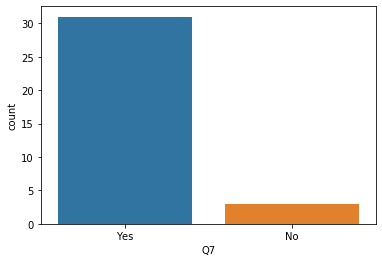

In [15]:
# how many people made a change in response to poor AQ? (Q7)
sns.countplot(x=data['Q7'][2:])
n_changed = len([item for item in data['Q7'][2:] if item == 'Yes'])
print('yes: ', n_changed)
print('no: ', len([item for item in data['Q7'][2:] if item == 'No'])) #note: how to treat the NANs?

In [20]:
#NOTE: make this the percentage out of people who made any change in response to AQ...

change_freqs = {}
for item in data['Q7a'][2:]:
    if type(item) is str:
        changes = item.split(',')
        for change in changes:
            if change in change_freqs:
                change_freqs[change] += 1
            else:
                change_freqs[change] = 1
                
for item in change_freqs:
    change_freqs[item] = 100*round(change_freqs[item]/n_changed, 3)

{'Wore a mask': 67.7, 'Avoided time outside': 90.3, 'Closed windows to your home': 90.3, 'Canceled/skipped activites': 71.0, 'Spent time in a different location with better air': 48.4, 'Used an air filter': 28.999999999999996, 'Did less strenuous exercise': 64.5, 'Took medication': 19.400000000000002, 'Other': 6.5, 'Avoided roads with heavy traffic': 9.700000000000001, 'Drove your car less': 28.999999999999996}


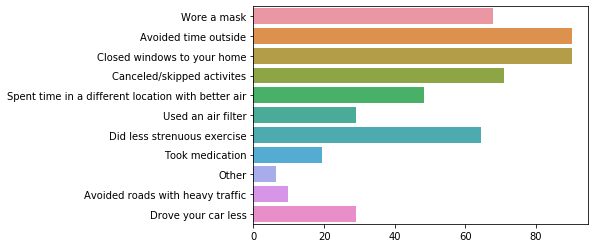

In [24]:
#change_freqs
# which changes did people make?
sns.barplot(y=list(change_freqs.keys()), x=list(change_freqs.values()), )
print(change_freqs)

0.3225806451612903


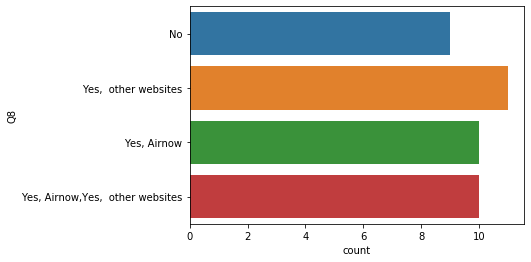

In [31]:
#which sites did people use? (what kind of vis are they looking at now?)
sns.countplot(y=data['Q8'][2:])
print(10/31)

0.717948717948718
39


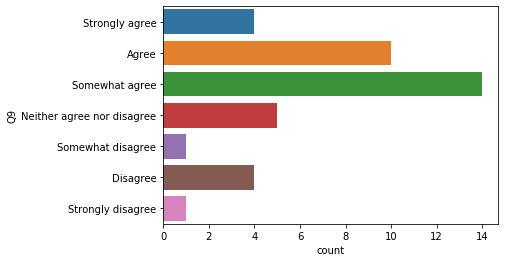

In [163]:
#did people feel they had accurate, complete information about the air quality near them?
sns.countplot(y=data['Q9'][2:], order=['Strongly agree', 'Agree', 'Somewhat agree', 'Neither agree nor disagree', 'Somewhat disagree', 'Disagree', 'Strongly disagree'])
print(len([i for i in data['Q9'][2:] if i == 'Strongly agree' or i == 'Agree' or i == 'Somewhat agree'])/len([i for i in data['Q9'][2:] if type(i) == str]))
print(len([i for i in data['Q9'][2:] if type(i) == str]))

In [59]:
# Q31. how did they decide what changes to make? 

# this is gonna be a manual thing...
answers = [answer for answer in data['Q31'][2:] if type(answer) == str]
for i in range(len(answers)):
    print(i, ': ', answers[i])

0 :  Common sense
1 :  Based on my lungs 
2 :  news
3 :  Common sense. Avoid the pollutants by either staying inside or using a mask outside
4 :  Common sense
5 :  Based on how poor the air quality was
6 :  All I could do, as needed
7 :  Recommendations from local government agencies and "common sense".
8 :  Based on exposure time and physical exertion. 
9 :  Followed other recommendations
10 :  Was advised to do those things
11 :  Read online what I should do
12 :  Common sense, mostly
13 :  Depended on the particular pollutant, and time of day.
14 :  Advice from others and common sense
15 :  Classes were cancelled by UC Davis, my roommates and I decided to spend time away from the area for clean air for a weekend.
16 :  Announcements and suggestions made by UC Davis or the government.
17 :  Research and doctor recommendations
18 :  logic - if the air is unhealthy to breathe outside, stay indoors and avoid being outside if you can.
19 :  School guidelines 
20 :  Advice and personal ju

In [77]:
# common sense or related answers: 
common_sense = [0, 3, 4, 5, 6, 12, 14, 18, 20]#, (possibly others)
# news or announcements/recommendations:
news = [2, 7, 9, 10, 11, 16, 17, 19, 20, 21]

# advice from others:
advice = [14]

#physical reaction or observation:
physical = [1]

In [78]:
len(common_sense) + len(news) + len(advice) + len(physical)

21

In [79]:
len(common_sense)/25

0.36

In [80]:
len(news)/25

0.4

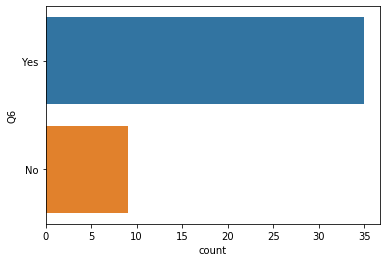

In [65]:
# did people know the AQ was bad?
sns.countplot(y=data['Q6'][2:])

In [66]:
35/(35+9)

0.7954545454545454

In [68]:
# for those who answered yes, how did they know the AQ was bad? 
# another manual one!
answers = [answer for answer in data['Q7b'][2:] if type(answer) == str]
for i in range(len(answers)):
    print(i, ': ', answers[i])

0 :  Spare the Air website
1 :  Saw bad air quality alert on weather app. 
2 :  With the fires in fall quarter, we looked online at a website for air quality scores (don't remember the website name).
3 :  news
4 :  From going outside and from looking up the aqi online. 
5 :  I couldn't see the sun
6 :  checked airnow.gov
7 :  The news weather meteorologist said air quality index was high as were pollen counts
8 :  Hazy air
9 :  It was orange outside.
10 :  By observation, but also by checking local air quality board's website and monitoring AQI's
11 :  AQI rating, visibility, smell of smoke.
12 :  You could see how smokey it was, you could smell it, everyone was talking about it, and campus closed.
13 :  Was informed by the news and school district because of surrounding fires. Many events were canceled. Due to poor air quality
14 :  Google gave me notifications when air quality would rise above a level that would affect people who are susceptible to air pollution.
15 :  By breathing, 

In [81]:
# site/ weather app/notification:
site = [0, 1, 4, 6, 10, 14, 16, 20, 21, 24, 25, 26, 30]

# fires:
fires = [2, 17, 22, 31]

# heard from someone else:
heard = [29]

# news/event: (i.e. school cancelled -- mention the demographic!)
news = [3, 7, 12, 13, 16, 17, 18, 21, 25, 27, 28, 30]

# physical condition:
phys = [4, 5, 8, 9, 10, 11, 12, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30]


51

In [84]:
len(site)/32

0.40625

In [88]:
(len(phys)+2)/32

0.71875

In [86]:
len(news)/32

0.375

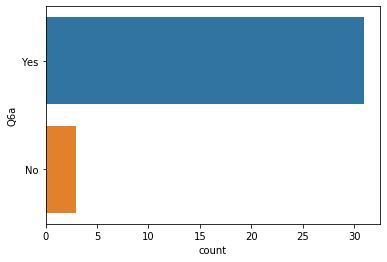

In [89]:
# did respondents say that the poor AQ was due to a fire?
sns.countplot(y=data['Q6a'][2:])

In [91]:
len([item for item in data['Q6a'][2:] if item == 'Yes'])

31

In [93]:
31/34

0.9117647058823529

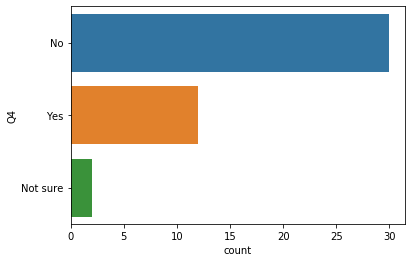

In [94]:
# did respondents say they had related health conditions?
sns.countplot(y=data['Q4'][2:])
# yes: 12
# no: 30
# not sure: 2

In [98]:
12/44


0.2727272727272727

In [100]:
answers = [answer for answer in data['Q11'][2:] if type(answer) == str]
for i in range(len(answers)):
    print(i, ': ', answers[i])

0 :  I live in the middle of the woods in Alabama, the air couldn’t get better
1 :  Definitely need to use one in my life!!
2 :  Pm 2.5 sensors are straight garbage and I feel for all the researchers who rely on them
3 :  I like it when meteorologists on TV explain the measurements to lay audiences. Moving from a region with good air quality to poor air quality has impacted my quality of living with me venturing outside less, thus getting less physical activity, and using more medication.
4 :  The rating given Is how I understand the health effects. Or, more frequently, just by the color. I almost certainly wouldn’t read additional info unless I was responsible for some people with asthma or other respiratory shit. 
5 :  I've found them to be pretty useful, generally. 
6 :  It's getting mighty crowded on this planet and in California. The air is getting a lot worse. I hope we can work towards some solutions or we're all not going to be able to breathe.
7 :  Purpleair network is great, 

In [155]:
#ehh, maybe can pull some quotes from here
print(len([i for i in data['Q10_2'] if type(i) == str]))

39


average:  4.702702702702703
std dev:  0.6520182746926928


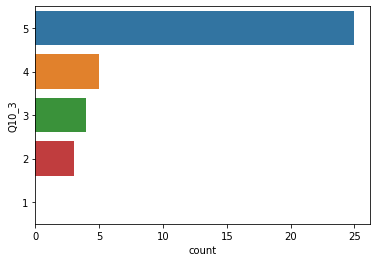

In [156]:
# rate the potential features of an AQI tool:
# see how bad the AQ might be in my location:
sns.countplot(y=data['Q10_3'][2:], order=['5', '4', '3', '2', '1'])
q10_1_ratings = [float(item) for item in data['Q10_1'][2:] if type(item) == str]
print('average: ', sum(q10_1_ratings)/len(q10_1_ratings))
29/37 # number of 5/5 ratings
print('std dev: ', np.std(q10_1_ratings))

average:  3.675675675675676
std dev:  1.3163022337173969
number 5/5:  0.40540540540540543


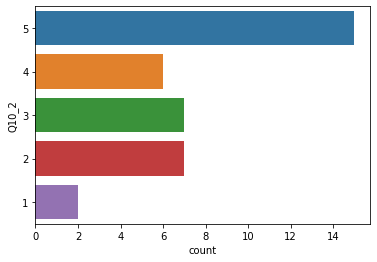

In [133]:
sns.countplot(y=data['Q10_2'][2:], order=['5', '4', '3', '2', '1'])
#understand the uncertainty: (much less interesting to people)
uncert_ratings = [float(item) for item in data['Q10_2'][2:] if type(item) == str]
print('average: ', sum(uncert_ratings)/len(uncert_ratings))
print('std dev: ', np.std(uncert_ratings))
print('number 5/5: ', len([i for i in uncert_ratings if i == 5])/len(uncert_ratings))

4.405405405405405
std dev:  0.9714703111141312


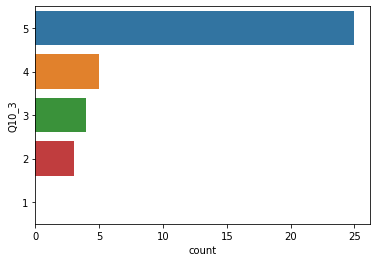

In [134]:
#know health risk corresponding to air quality:
sns.countplot(y=data['Q10_3'][2:], order=['5', '4', '3', '2', '1'])
health_ratings = [float(i) for i in data['Q10_3'][2:] if type(i) == str]
print(sum(health_ratings)/len(health_ratings))
print('std dev: ', np.std(health_ratings))

average:  4.277777777777778
std dev:  0.9606453592105879
0.5555555555555556


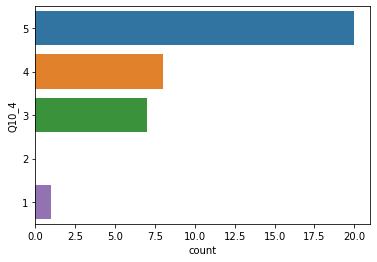

In [136]:
# know whether it's worth skipping outdoor activities:
sns.countplot(y=data['Q10_4'][2:], order=['5', '4', '3', '2', '1'])
skip_rating = [float(i) for i in data['Q10_4'][2:] if type(i) == str]
print('average: ', np.mean(skip_rating))
print('std dev: ', np.std(skip_rating))
print(20/len(skip_rating))

average:  3.4166666666666665
std dev:  1.4601179556612693


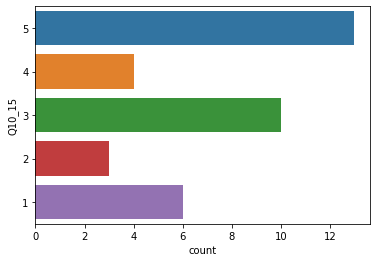

In [137]:
# understand how we know the AQ in a given location:
sns.countplot(y=data['Q10_15'][2:], order=['5', '4', '3', '2', '1'])
how_rating = [float(i) for i in data['Q10_15'][2:] if type(i) == str]
print('average: ', np.mean(how_rating))
print('std dev: ', np.std(how_rating))
# people aren't really interested in how we know (or what the uncertainty is)

In [120]:
answers = [item for item in data['Q10_16_TEXT'] if type(item) == str]
for i in range(len(answers)):
    print(i, ': ', answers[i])

0 :  Here, we list several features that could be added to an air quality map like the one above. For each feature, rate how helpful it would be to include in an air quality monitoring tool. - Other - Text
1 :  {"ImportId":"QID172807696_16_TEXT"}
2 :  zoom to my location
3 :  Historical averages for my location


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


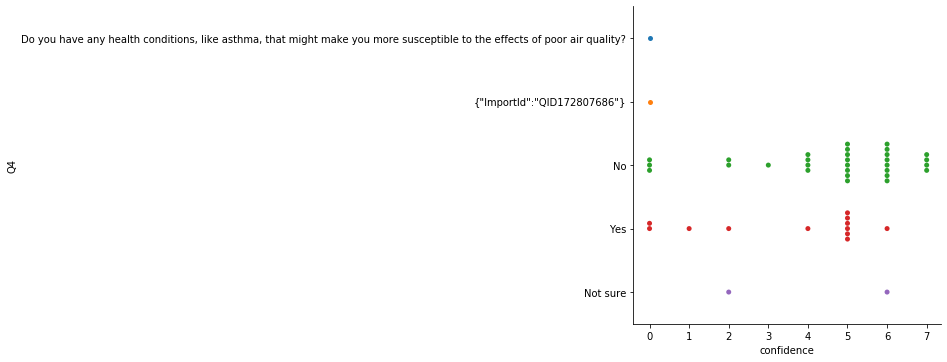

In [152]:
# back the minority of people who have more doubts in the AQ inforomation and any of the demographic categories?
# education level:

def get_level(string):
    if string == 'Strongly agree':
        return 7
    elif string == 'Agree':
        return 6
    elif string == 'Somewhat agree':
        return 5
    elif string == 'Neither agree nor disagree':
        return 4
    elif string == 'Somewhat disagree':
        return 3
    elif string == 'Disagree':
        return 2
    elif string == 'Strongly disagree':
        return 1
    else:
        return 0

data['confidence'] = [get_level(item) for item in data['Q9']]

sns.catplot(y='Q4', x='confidence', kind="swarm", data=data);

In [161]:
print(data['Finished'][2:])
finished = [f for f in data['Finished'][2:] if f == 'True']
print(len(finished))

2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15    False
16     True
17    False
18    False
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27    False
28    False
29    False
30     True
31     True
32     True
33     True
34    False
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46    False
47     True
48    False
49    False
50    False
51    False
52     True
53     True
Name: Finished, dtype: object
40
